# <center>2019 Indian General Elections Poll Analysis</center>
<center>
<img src="https://m.economictimes.com/thumb/msid-67717352,width-1200,height-900,resizemode-4,imgsize-167555/vote-bccl.jpg" width="450">
</center>


In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv("/content/LS_2.0.csv")

<div style="background-color:red; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Data Preparation and Cleaning</h2>
</div>

----

- After downloading the dataset, clean to extract only the columns which will be needed for analysis.   

- Now, we will convert the `ASSETS`, `LIABILITIES` columns into numerics values.

In [3]:
def convert(x):
    # Extract the numeric value from the passed string and return it as float

    if str(x)[0]=='R':
        # this is to ensure only valid values (and not NaN Values) are converted
        return float(str(x).split()[1].replace(",",""))
    return 0.0


In [4]:
df['ASSETS']=df['ASSETS'].apply(convert)
df['LIABILITIES']=df['LIABILITIES'].apply(convert)

In [5]:
df.head(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690


When the data was analysed later, it was found that the following categories in `EDUCATION` column would cause some uncertainities in the visualization process. Hence those are updated here itself, for all subsequent DataFrames.

In [6]:
df['EDUCATION'] = df['EDUCATION'].str.replace('Post Graduate\n', 'Post Graduate')

df['EDUCATION'] = df['EDUCATION'].str.replace('Graduate Professional', 'Graduate\nProfessional')

There are holes in data which must be fixed before to avoid erros later.

In [7]:
df['WINNER'] = df['WINNER'].replace(702,1)
df['WINNER'] = df['WINNER'].replace(192, 1)
df['WINNER'] = df['WINNER'].replace(951, 1)
df['WINNER'] = df['WINNER'].replace(1132, 1)
df['WINNER'] = df['WINNER'].replace(172, 0)

**Now we drop the unnecessary columns and create a new DataFrame `candidates_df` and change some column names for visualization purposes.**

In [8]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [9]:
# remove unnecessary columns

candidate_df=df.drop(['SYMBOL', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
                        'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'], axis=1)

In [10]:
# rename some of the columns and sort the data with respect to State and Constituency columns

candidate_df.rename(columns = {"CRIMINAL\nCASES": "CRIMINAL CASES", "TOTAL\nVOTES": "TOTAL VOTES"}, inplace = True)
candidate_df.sort_values(["STATE", "CONSTITUENCY"], inplace = True)

In [11]:
candidate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2263 entries, 105 to 2171
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   GENDER          2018 non-null   object 
 6   CRIMINAL CASES  2018 non-null   object 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   object 
 9   EDUCATION       2018 non-null   object 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     2263 non-null   float64
 12  TOTAL VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 265.2+ KB


Convert the data of `CRIMINAL CASES` column to numeric type

In [12]:
candidate_df['CRIMINAL CASES']=pd.to_numeric(candidate_df['CRIMINAL CASES'],errors='coerce').convert_dtypes()

**some more editing is done, and only the personal details of non-NOTA candidate is extracted and stored in a new DataFrame `candidate_personal_df`**

In [13]:
candidate_personal_df=candidate_df[candidate_df.NAME != 'NOTA']

In [14]:
candidate_personal_df = candidate_personal_df.drop(["TOTAL VOTES", "TOTAL ELECTORS"], axis = 1)

In [15]:
candidate_personal_df.describe()

,WINNER,CRIMINAL CASES,AGE,ASSETS,LIABILITIES
count,2018.000000,1996.0,2018.000000,2.018000e+03,2.018000e+03
mean,0.267096,1.46994,52.273538,1.315849e+08,1.973860e+07
std,0.442553,7.677432,11.869373,4.122697e+08,8.945292e+07
min,0.000000,0.0,25.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.0,43.250000,6.272526e+06,0.000000e+00
50%,0.000000,0.0,52.000000,2.404181e+07,9.039245e+05
75%,1.000000,1.0,61.000000,9.152498e+07,6.097971e+06
max,1.000000,240.0,86.000000,8.950179e+09,1.547511e+09


**Another DataFrame `winner_df` is created which contains the details of only the winning candidates.** some operations are performed to shape the DataFrame are required.

In [16]:
# Extract the list of winners
winner_df= candidate_df[candidate_df['WINNER']==1].sort_values(['STATE','CONSTITUENCY']).reset_index()

In [17]:
winner_df.drop(['index','WINNER'],axis=1, inplace=True)

In [18]:
winner_df.head()

,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0,95308,318471
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,YSRCP,FEMALE,0,46.0,SC,Graduate,85993362.0,2431407.0,485958,1459556
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,YSRCP,FEMALE,0,52.0,GENERAL,Graduate\nProfessional,91526244.0,11139279.0,586226,1521363
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,YSRCP,MALE,2,48.0,GENERAL,Doctorate,11773091.0,1135547.0,695208,1664160
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,YSRCP,FEMALE,0,26.0,ST,Graduate\nProfessional,141179.0,0.0,562190,1451418


In [19]:
print('Number of Parties Which fielded at least 1 candidate:',candidate_df['PARTY'].unique().shape[0]-2)

Number of Parties Which fielded at least 1 candidate: 131


In [20]:
print("Number of Independent Candidates who contested the elections: ", candidate_df[candidate_df.PARTY == 'IND'].shape[0])

Number of Independent Candidates who contested the elections:  201


In [21]:
print("Number of Parties which won at least 1 seat: ", winner_df.PARTY.unique().shape[0] - 1)
                                                                # -1 : for independent winners

Number of Parties which won at least 1 seat:  35


In [22]:
print("Number of Independent Winners: ", winner_df[winner_df.PARTY == 'IND'].shape[0])

Number of Independent Winners:  4


<div style="background-color:red; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Exploratory Analysis and Visualization</h2>
</div>

In this part we analyse the simplified Dataset to extract some basic information and trends about the outcome of the elections and the candidates.

<div style="background-color:lightgreen; padding:10px; border-radius:5px;">
    <h3 style="color:black; font-weight:bold; text-align:left-corner;">Seat Share</h3>
</div>

Here we calculate how many seats were won by each party, and the percentage seat distribution of the House.

---

In [23]:
# frequency of each PARTY in the winner list

all_party_seats = winner_df.PARTY.value_counts().sort_values(ascending = False)

In [24]:
all_party_seats

PARTY
BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BSP        11
BJD        11
TRS         9
LJP         6
SP          5
CPI(M)      5
NCP         5
IND         4
JKN         3
TDP         3
IUML        3
AIMIM       2
ADAL        2
SAD         2
NPEP        1
MNF         1
NDPP        1
AIUDF       1
KEC(M)      1
AAP         1
RLTP        1
SKM         1
RSP         1
VCK         1
AIADMK      1
JD(S)       1
JMM         1
AJSUP       1
NPF         1
Name: count, dtype: int64

In [25]:
# simplifying the output for visualization purposes

others = all_party_seats[all_party_seats<10].sum()

In [26]:
seat_distribution = pd.concat([all_party_seats[all_party_seats >= 10], pd.Series({"Others": others})])


In [27]:
seat_distribution

BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BSP        11
BJD        11
Others     64
dtype: int64

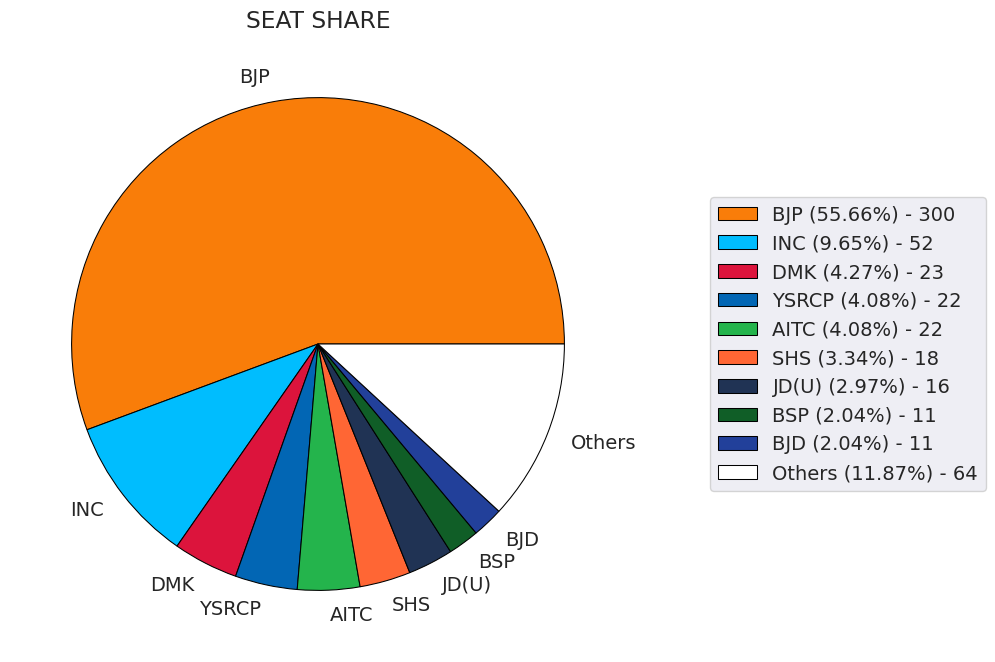

In [28]:
plt.figure(figsize = (10,8))
plt.title("SEAT SHARE")
# basic details

plt.pie(seat_distribution, labels = seat_distribution.index,
        colors = ['#f97d09', '#00bdfe', '#dc143c', '#0266b4', '#24b44c', '#ff6634',
                                     '#203354', '#105e27', '#22409a', '#FFFFFF'],
        wedgeprops = {'edgecolor' : 'black', 'linewidth' : 0.75, 'antialiased' : True})
# pie chart created using the Data, labels, colors, and wedge border properties
# colors are customised according to each party's colors

seat_percent = round((seat_distribution/seat_distribution.sum())*100,2)
legend = seat_percent.index + " (" + seat_percent.values.astype(str) + "%) - " + seat_distribution.values.astype(str)
# the legend would the percentage seat share of each party (& others)

plt.legend(legend, loc = "right", bbox_to_anchor = (1.6,0.5));
# legend is placed outside the main chart accordingly

As we can see, the **BJP** was the single largest party with more than 50% of the seats in the House, with **INC** at a distant second.
<br> Other regional parties like **DMK**, **YSRCP**, **AITC**, **BJD** won some seats in their respective states, but no Alliance could pose as an alternative to **BJP**.

<div style="background-color:lightgreen; padding:10px; border-radius:5px;">
    <h3 style="color:black; font-weight:bold; text-align:left-corner;">Age</h3>
</div>

In this part we analyse the number of candidates, both contestants and winners, in each age group.

---

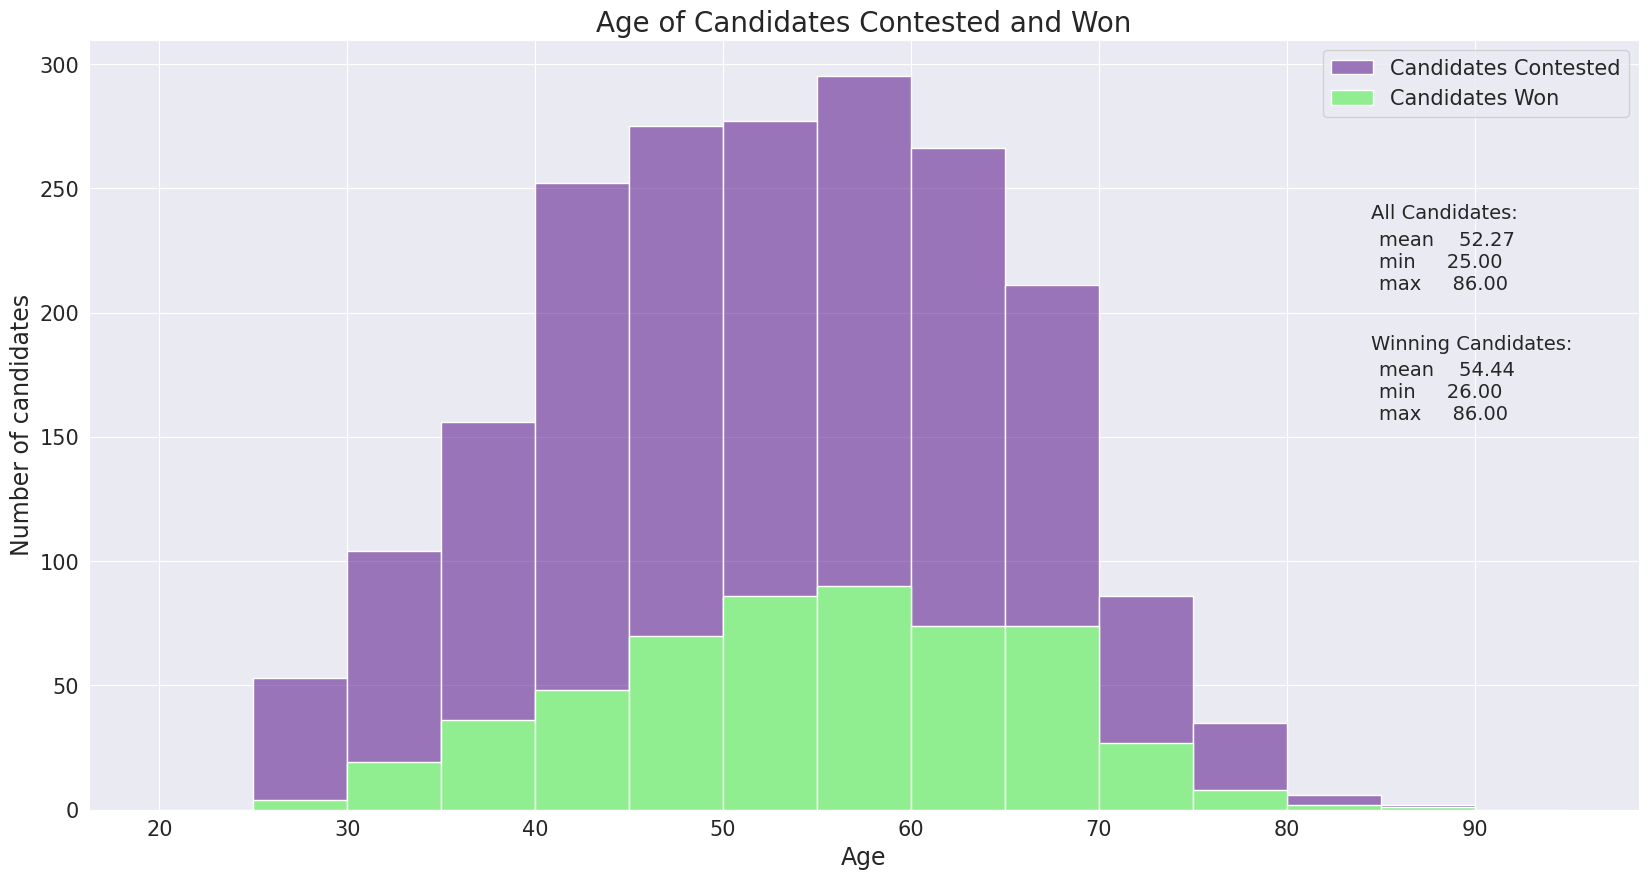

In [29]:
# We plot a `nested histogram` with each `bin` of size `5`**,
# And calculate the mean, maximum and minimum age of all candidates and winners.

plt.figure(figsize = (20,10))
plt.title("Age of Candidates Contested and Won", fontsize=20)
plt.xlabel("Age", fontsize=17)
plt.ylabel("Number of candidates", fontsize=17)
# put the basic labelling

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# axes ticks size

sns.histplot(data = candidate_personal_df, x = 'AGE', bins = np.arange(20,100,5), color = 'indigo', alpha = 0.5)
sns.histplot(data = winner_df, x = 'AGE', bins = np.arange(20,100,5), color = 'lightgreen', alpha = 1)
# two histograms plotted, Won over Contested to show the relative percentage

plt.legend(["Candidates Contested", "Candidates Won"], fontsize = 15)
# legend to the plot

plt.text(84.5, 238, "All Candidates:")
plt.figtext(0.77, 0.63, round(candidate_personal_df.describe().AGE[['mean', 'min', 'max']], 2).to_string())

plt.text(84.5,185, "Winning Candidates:")
plt.figtext(0.77, 0.5, round(winner_df.describe().AGE[['mean', 'min', 'max']], 2).to_string());
# basic stats printed

As we can see from the Nested Histogram, the age group `55-60` has the maximum number of Candidates, and Winners, followed closely by the age group `50-55`. <br> The average age of the house - `54 years` also lies in this range. A majority of the winners are between the ages `45-70`, which can be considered as the normal peak years of a Politician.

In [30]:
print("Oldest Member of the House:")
winner_df[(winner_df.AGE == 86)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Oldest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,DR. SHAFIQUR REHMAN BARQ,SP,Uttar Pradesh,SAMBHAL




```
# This is formatted as code
```

<div style="background-color:lightgreen; padding:10px; border-radius:5px;">
    <h3 style="color:black; font-weight:bold; text-align:left-corner;">Seat Category</h3>
</div>

Here we calculate the ratio of seats which have a special reservation status for candidates of different backward classes.

---

In [31]:
# winner_df has 1 constituency only 1 time, so analysing its CATEGORY column will give the correct result

seat_category = winner_df.CATEGORY.value_counts()

In [32]:
pd.DataFrame(seat_category)

,count
CATEGORY,
GENERAL,399
SC,85
ST,55


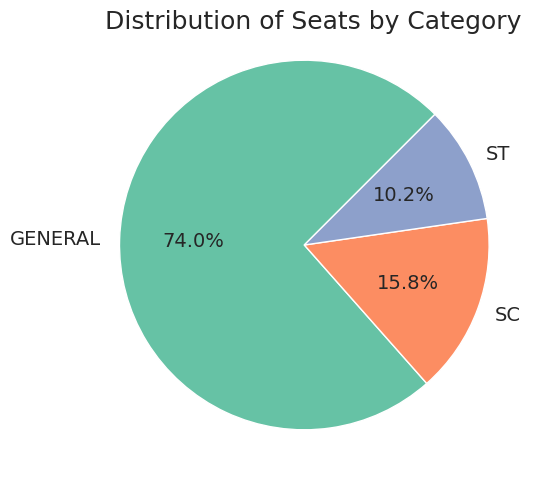

In [33]:
# percentage of seats shown on the plot

sns.set_palette(sns.color_palette('Set2'))
plt.figure(figsize=(10,6))
plt.title("Distribution of Seats by Category", size=18, x = 0.52, y =0.95)

plt.pie(seat_category, labels = seat_category.index, autopct = '%1.1f%%', startangle = 45)
plt.show()

As we can see, about `26%` seats in the Lok Sabha are reserved for SC and ST candidates, which is appropriate as they comprise about 25% of the population (as per the 2011 Census).

<div style="background-color:lightgreen; padding:10px; border-radius:5px;">
    <h3 style="color:black; font-weight:bold; text-align:left-corner;"> Gender</h3>
</div>

 In this section we see the gender diversity of the contesting candidates, as well as the winning Members of Parliament.

 ---

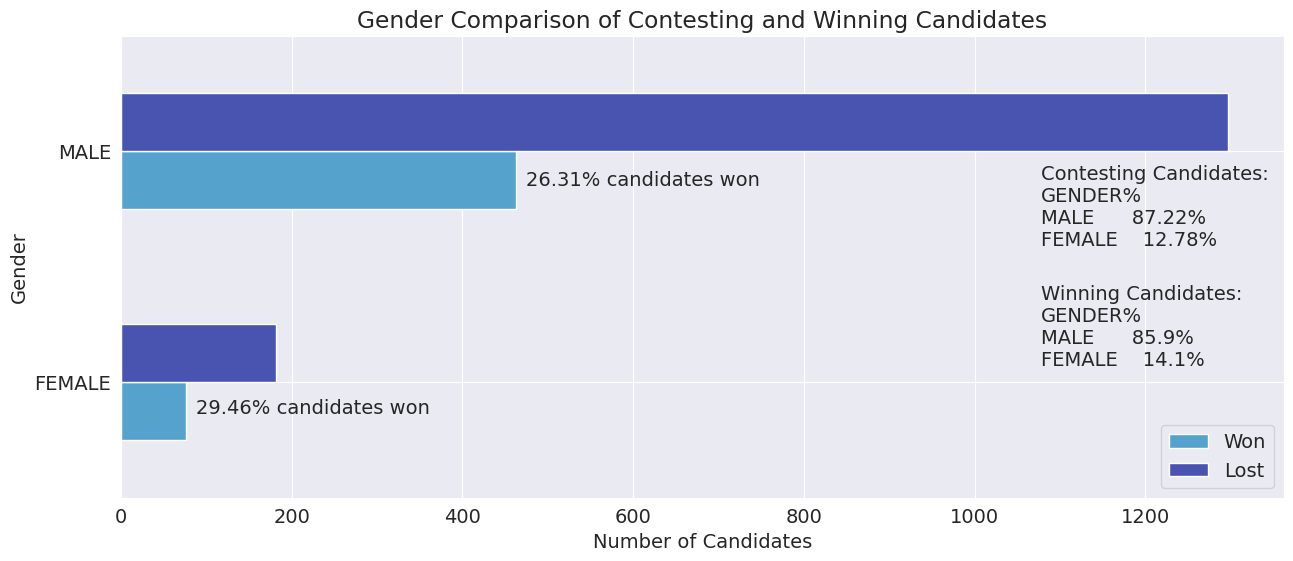

In [34]:
gender_group = candidate_personal_df.groupby(["GENDER", "WINNER"]).size()
gender_group = gender_group.unstack()
gender_group = gender_group[[1,0]]


# gender with winning condition is extracted as a dataframe

sns.set_palette(sns.color_palette("icefire"))
# color palette set
gender_group.plot(kind = 'barh', figsize = (15,6), title = "Gender Comparison of Contesting and Winning Candidates")
# horizontal bar plot created with Pandas

plt.legend(["Won", "Lost"])
plt.xlabel("Number of Candidates")
plt.ylabel("Gender")
# legend and labels set

plt.figtext(0.738,0.53, "Contesting Candidates:\n" +
            round((candidate_personal_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

plt.figtext(0.738,0.33, "Winning Candidates:\n" +
            round((winner_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

# Total candidates statistics (percentages) printed on the chart, with some applied String formatting to give the look

win_percent = round((winner_df.GENDER.value_counts()/candidate_personal_df.GENDER.value_counts())*100,2)
plt.figtext(0.395, 0.63, str(round(win_percent.MALE,2)) + "% candidates won")
plt.figtext(0.175, 0.25, str(round(win_percent.FEMALE,2))+ "% candidates won")
plt.show()

In [35]:
print("No. of male MPs: ", winner_df.GENDER.value_counts()["MALE"])
print("No. of female MPs: ", winner_df.GENDER.value_counts()["FEMALE"])

No. of male MPs:  463
No. of female MPs:  76


As we can see, the House has `14.4%` Female members and `85.6%` Male members.
<br> </br>
One surprising inference we can draw from the Analysis is that despite a higher percentage of Male Candidates contesting the elections than Female (`87.2%` vs `12.8%`), the percentage of Female Contestants who won was greater than that of Male Contestants (`30.2%` vs `26.4%`).
<br> ***This means, a Female Candidate had a greater chance of winning the election than a Male Candidate.***

<div style="background-color:lightgreen; padding:10px; border-radius:5px;">
    <h3 style="color:black; font-weight:bold; text-align:left-corner;">Educational Qualifications</h3>
</div>

 Here we analyse the educational qualifications of all the Winning Candidates.

 ---

In [36]:
winner_df["EDUCATION"].unique()

array(['Graduate\nProfessional', 'Graduate', 'Doctorate', '8th Pass',
       'Post Graduate', '12th Pass', '10th Pass', 'Literate', 'Others',
       '5th Pass', 'Illiterate'], dtype=object)

In [37]:
# arrange the Series in a systematic order

education = winner_df.EDUCATION.value_counts()
education = education.reindex(["Illiterate", "Literate", "5th Pass", "8th Pass", "10th Pass", "12th Pass", "Graduate",
                               "Graduate\nProfessional","Post Graduate", "Doctorate", "Others"])

In [38]:
education

EDUCATION
Illiterate                  1
Literate                    2
5th Pass                    4
8th Pass                   12
10th Pass                  45
12th Pass                  69
Graduate                  132
Graduate\nProfessional     99
Post Graduate             135
Doctorate                  23
Others                     17
Name: count, dtype: int64

<Axes: title={'center': 'EDUCATIONAL QUALIFICATIONS OF WINNERS'}, xlabel='Education Status', ylabel='No. of Candidates'>

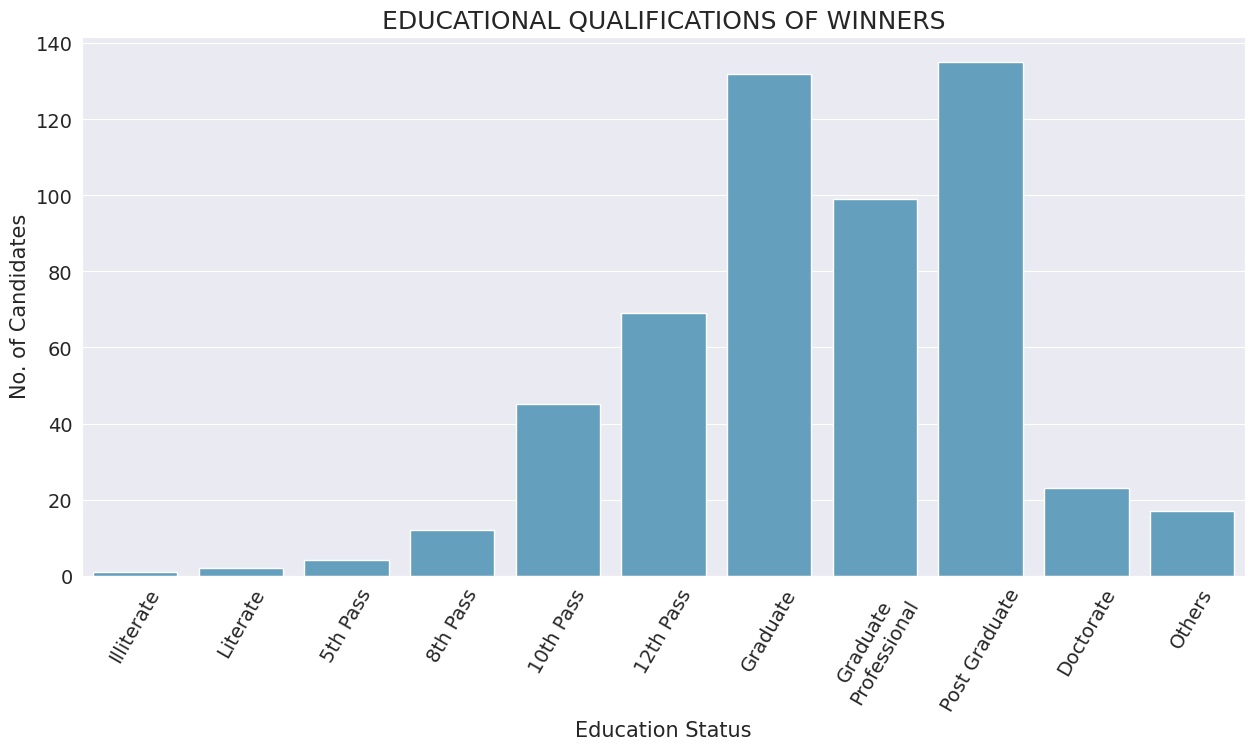

In [39]:
# plotting the barplot

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60);
# plot detailing

plt.xlabel("Education Status", fontsize = 15)
plt.ylabel("No. of Candidates", fontsize = 15)
plt.title("EDUCATIONAL QUALIFICATIONS OF WINNERS",fontsize = 18)
# labels and title

sns.barplot(x = education.index, y = education.values)

We see, contrary to popular belief, most MPs are well educated and have at least a `Graduate` degree.
<br> There are less than 150 MPs who are `12th Pass` or below.

**Here we selected some specific columns of the DataFrames and performed Analysis and Visualization on those data. Now we shall move onto more complex Analysis and answering specific Questions.**

<div style="background-color:lightblue; padding:8px; border-radius:5px;">
    <h2 style="color:black; font-weight:bold; text-align:center;">Q1: Which States/UTs and Constituencies had the highest and the lowest Voter Turnout?</h2>
</div>

We first create a new DataFrame `votes_df` with the sum of `TOTAL VOTES` column of the `candidates_df` DataFrame and the sum of `TOTAL ELECTORS` column of the `winners_df` DataFrame, grouping them by the `STATE` and `CONSTITUENCY` columns and append the `VOTER TURNOUT` in each constituency, as a column, to the end of the DataFrame.

---

In [40]:
total_voters = candidate_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL VOTES"]].sum()
total_electors = winner_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL ELECTORS"]].sum()
votes_df = total_voters.join(total_electors)
votes_df["VOTER TURNOUT"] = round(votes_df["TOTAL VOTES"]/votes_df["TOTAL ELECTORS"]*100,2)

First we analyse the data to answer the second part of the question, i.e., **Which Constituencies had the highest and the lowest Voter Turnout?**

In [41]:
# getting the highest and the lowest Voter Outcome Constituencies

# this is done purely for visualization purposes
votes_df = votes_df.rename(index = {"Andaman & Nicobar Islands": "Andaman &\nNicobar Islands"})
# Voter Turnout of all constituencies
const_turnout = votes_df.sort_values(by = ["VOTER TURNOUT"], ascending = False)

high_consts = const_turnout.head(10)
low_consts = const_turnout.tail(10)

In [42]:
# Just for aesthetics

xh = high_consts.index.get_level_values(1) + "\n(" + high_consts.index.get_level_values(0) + ")"
xl = low_consts.index.get_level_values(1) + "\n(" + low_consts.index.get_level_values(0) + ")"

We now have the required answer for Constituencies.
<br>Now we analyse the data to answer the first part of the question, i.e., **Which States/UTs had the highest and the lowest Voter Turnout?**

In [43]:
# getting the state-wise data now
states_df = votes_df.groupby("STATE").sum().drop(["VOTER TURNOUT"], axis = 1)
states_df["VOTER TURNOUT"] = round(states_df["TOTAL VOTES"]/states_df["TOTAL ELECTORS"]*100,2)

In [44]:
# getting the highest and lowest Voter Outcome States

states_turnout = states_df.sort_values(by = "VOTER TURNOUT", ascending = False)
high_stat = states_turnout.head(10)
low_stat = states_turnout.tail(10)

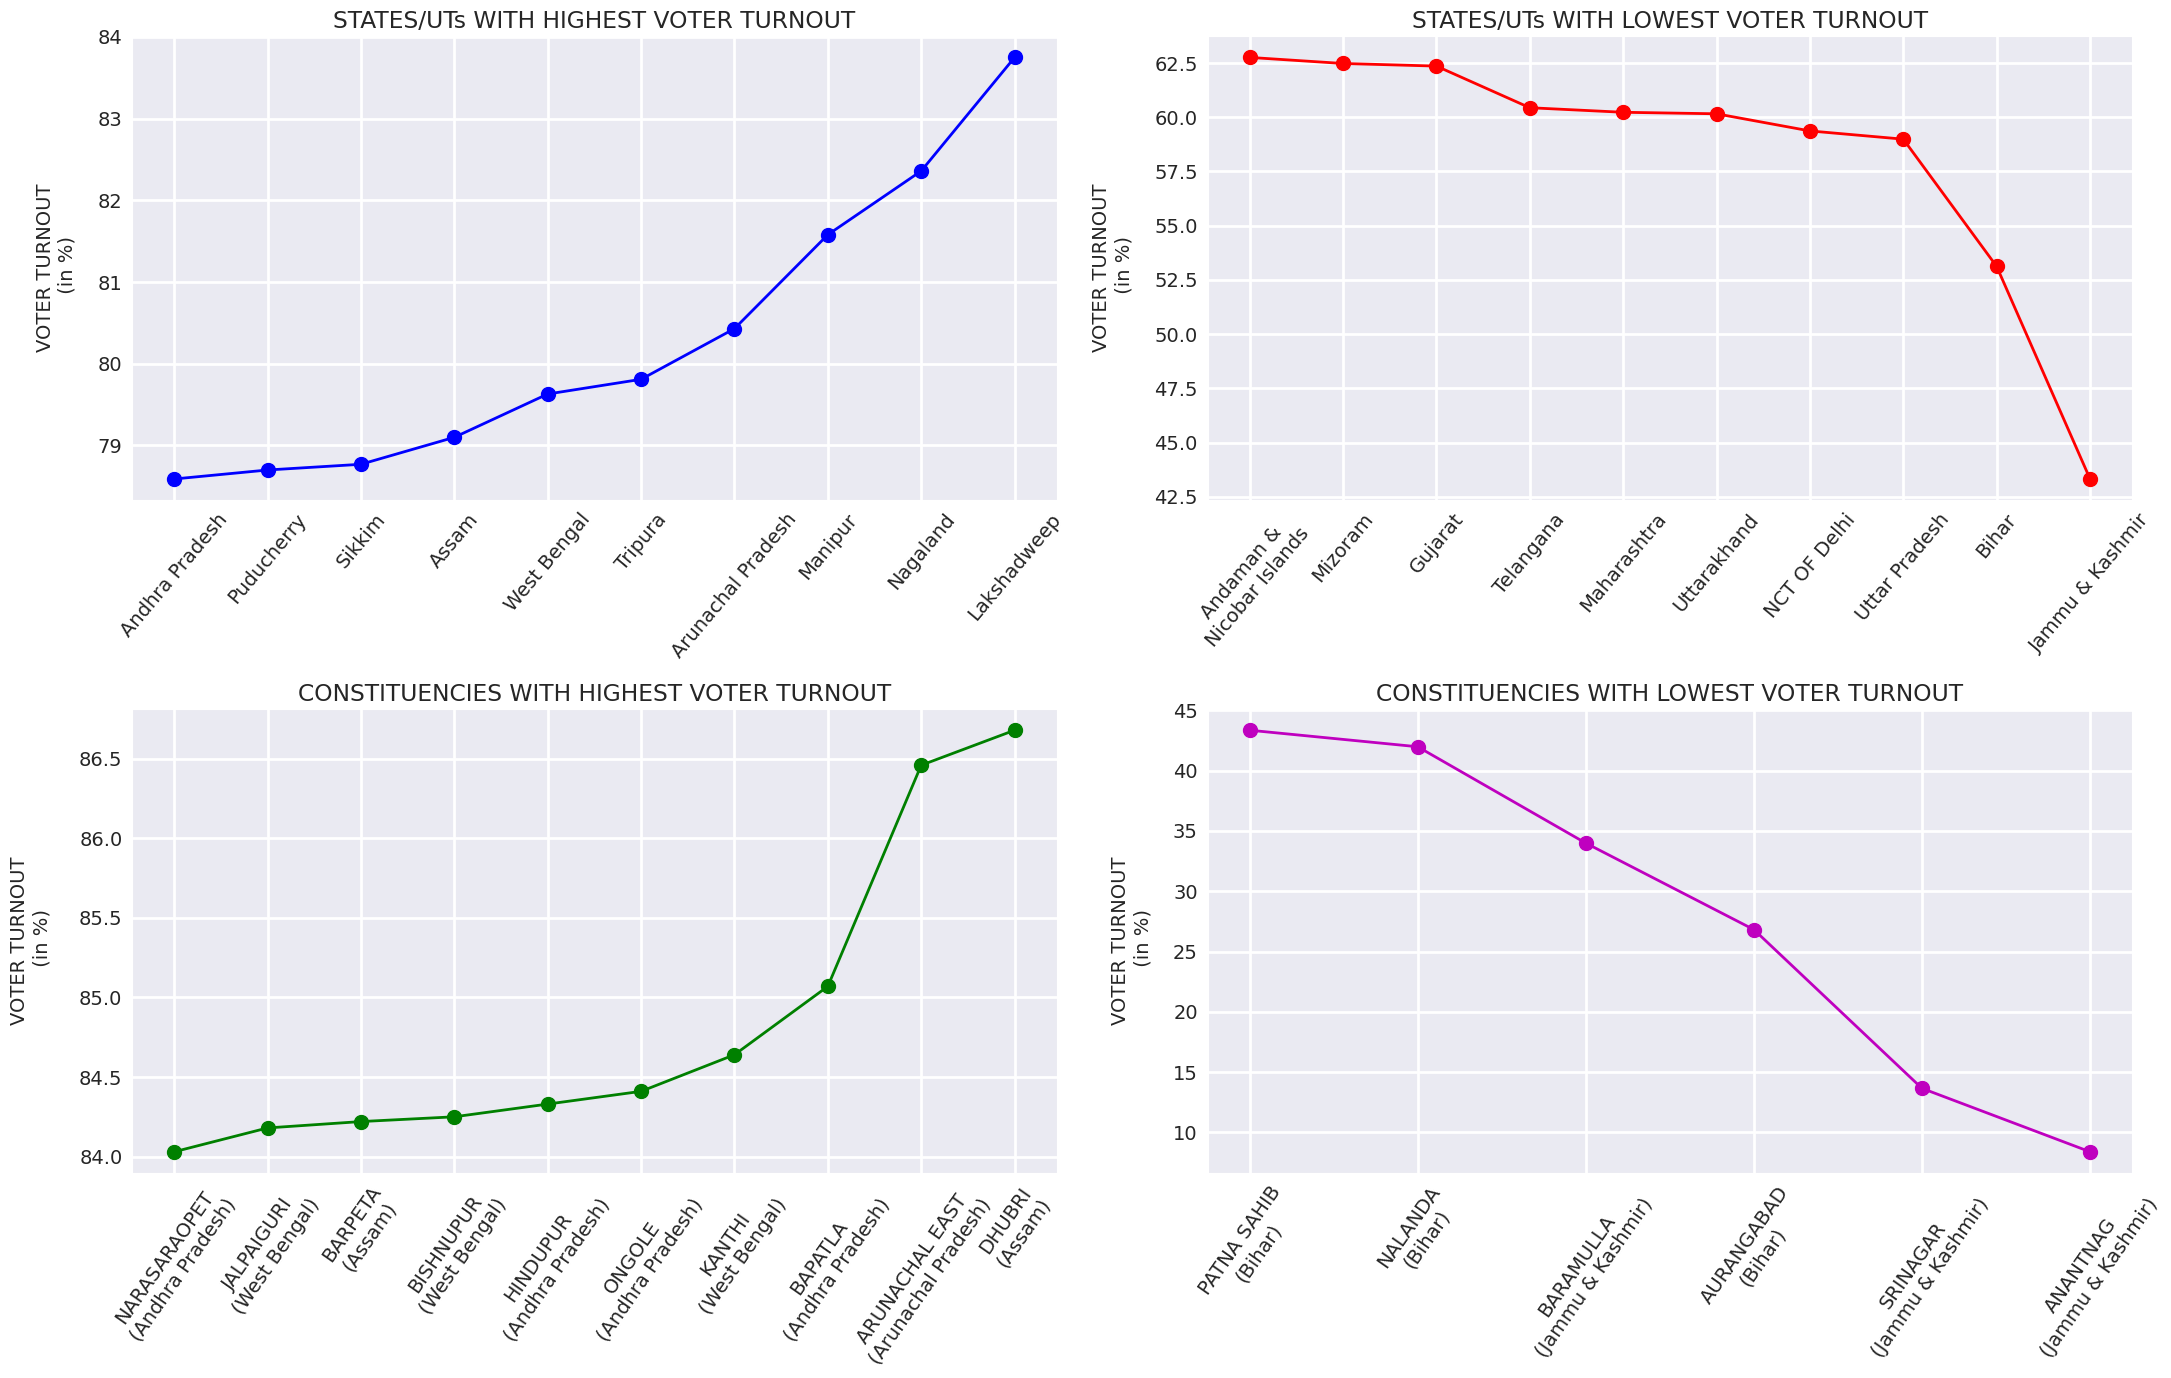

In [45]:
fig, axes = plt.subplots(2,2, figsize = (22,14))
# plot will be a subplot of 4 plots
# First row will be of States, second row of Constituencies

# Highest State Voter Outcome Plot
axes[0][0].tick_params(axis = 'x', labelrotation = 50)
axes[0][0].plot(high_stat.index[::-1], high_stat["VOTER TURNOUT"][::-1], 'b-o', linewidth = 2,
         markersize = 10)
axes[0][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][0].set_title("STATES/UTs WITH HIGHEST VOTER TURNOUT")
axes[0][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest State Voter Outcome Plot
axes[0][1].tick_params(axis = 'x', labelrotation = 50)
axes[0][1].plot(low_stat.index, low_stat["VOTER TURNOUT"], 'r-o', linewidth = 2,
         markersize = 10)
axes[0][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][1].set_title("STATES/UTs WITH LOWEST VOTER TURNOUT")
axes[0][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

# Now the Constituencies

# Highest Consituency Voter Outcome Plot
axes[1][0].tick_params(axis = 'x', labelrotation = 55)
axes[1][0].plot(xh[::-1], high_consts["VOTER TURNOUT"][::-1], 'g-o', linewidth = 2,
         markersize = 10)
axes[1][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 20)
axes[1][0].set_title("CONSTITUENCIES WITH HIGHEST VOTER TURNOUT")
axes[1][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest Constituency Voter Outcome Plot
axes[1][1].tick_params(axis = 'x', labelrotation = 55)
axes[1][1].plot(xl, low_consts["VOTER TURNOUT"], 'm-o', linewidth = 2,
         markersize = 10)
axes[1][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][1].set_title("CONSTITUENCIES WITH LOWEST VOTER TURNOUT")
axes[1][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

fig.tight_layout();
# to prevent overlapping of plots

In [46]:
nat_average = round(states_turnout.sum()["TOTAL VOTES"]/states_turnout.sum()["TOTAL ELECTORS"]*100,2)
print("National Voter Turnout: ", nat_average, "%", sep="")

National Voter Turnout: 65.65%


We infer from the plots, that **Lakshadweep** had the highest Voter Turnout **~87%**, while **Jammu & Kashmir** had the lowest Voter Turnout **~43%**. <br>Six North-Eastern states were in the top 10 of *Highest Voter Turnout*, whereas Kingmaker states like Uttar Pradesh, Bihar, Maharashtra, Delhi were in the top 10 of *Lowest Voter Turnout.*
<br><br>**Dhubri in Assam** saw the Highest Voter Turnout in all of India, with about **87%** eligible voters coming out to vote, whereas **Anantnag in J&K** saw the Lowest Voter Turnout with less **10%** eligible voters casting their vote.
<br>*Andhra Pradesh, West Bengal and Assam* saw some of the best performing Constituencies in terms of Voter Turnout. On the other hand, *Telangana, Bihar and Jammu & Kashmir* having some of the poorest performing Constituencies in terms of Voter Turnout.

<div style="background-color:lightblue; padding:8px; border-radius:5px;">
    <h2 style="color:black; font-weight:bold; text-align:center;">Q2: How many elected MPs have a criminal record and what is their party-wise distribution?</h2>
</div>

We create a new Pandas Series `crime` from the `winners_df` DataFrame containing party-wise distribution of number of MPs having at least 1 criminal case against them.

----

In [47]:
# criminal record of each party

crime = winner_df[winner_df["CRIMINAL CASES"] != 0]['PARTY'].value_counts()

In [48]:
# party-wise distribution

crime

PARTY
BJP       114
INC        30
JD(U)      13
SHS        11
YSRCP      10
DMK        10
AITC        9
LJP         6
BSP         6
TRS         3
NCP         2
SP          2
AIMIM       2
IND         2
IUML        2
CPI(M)      2
TDP         1
BJD         1
SAD         1
AIUDF       1
VCK         1
AJSUP       1
JKN         1
ADAL        1
RSP         1
Name: count, dtype: int64

In [49]:
# shortening the Series for better visualization

crime = pd.concat([crime[:9], pd.Series([crime[9:].sum()], index=["Others"])])

# taking total 10 elements in the series
crime["Others"] = crime[9:].sum()
crime = crime[:9]


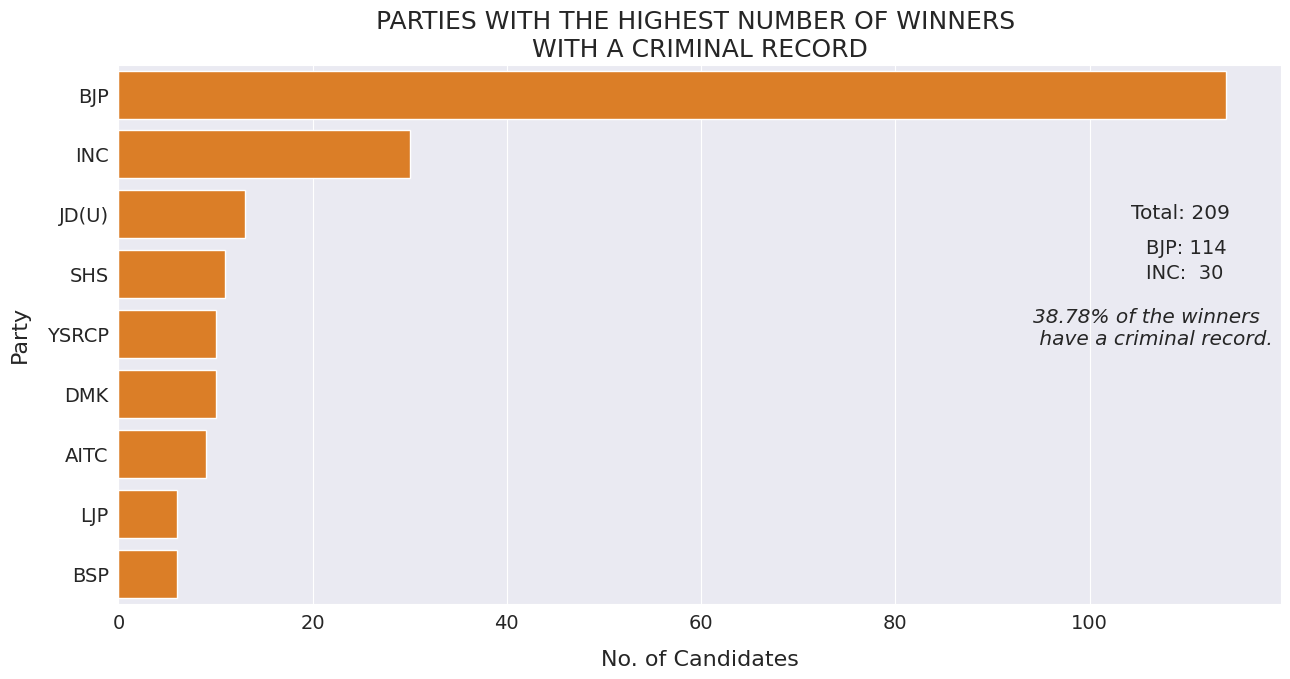

In [50]:
plt.figure(figsize = (15,7))

palette = ['#f97d09', '#00bdfe', '#228b22', '#ff6634', '#0266b4', '#dc143c', '#24b44c',
                                      'yellow', '#22409a', 'grey']
# color palette is customized to correspond to each party's colors
sns.barplot(x = crime.values, y = crime.index, palette = sns.set_palette(palette, 10))
# the data is plotted as a horizontal bar plot

plt.title("PARTIES WITH THE HIGHEST NUMBER OF WINNERS \nWITH A CRIMINAL RECORD", fontsize = 18)
plt.ylabel("Party", fontsize = 16, labelpad = 12)
plt.xlabel("No. of Candidates", fontsize = 16, labelpad = 12)
plt.tick_params(labelsize = 14) # increase label size
# plot detailing

plt.figtext(0.8, 0.66, "Total: " + str(crime.sum()), fontsize = 14.5)
plt.figtext(0.81, 0.61, "BJP: " + str(crime["BJP"]), fontsize = 14)
plt.figtext(0.81, 0.575, "INC:  " + str(crime["INC"]), fontsize = 14)
plt.figtext(0.735, 0.48, str(round(crime.sum()/winner_df.shape[0]*100,2))+ "% of the winners\n have a criminal record.",
            fontsize = 14.5, style = 'oblique');
# printing details on the graph

In [51]:
# Some other stats

print(round(crime["BJP"]/seat_distribution["BJP"]*100, 2), "% BJP MPs have a criminal record.", sep = "")
print(round(crime["INC"]/seat_distribution["INC"]*100, 2), "% INC MPs have a criminal record.", sep = "")
print("Both the parties combined gave ", round(crime[["BJP", "INC"]].sum()/crime.sum()*100, 2), "% of the criminals to the House.",
      sep = "")

38.0% BJP MPs have a criminal record.
57.69% INC MPs have a criminal record.
Both the parties combined gave 68.9% of the criminals to the House.


**BJP** and **INC** are explicitly mentioned because they are the largest parties in the house.
<br>We see, as per the popular belief, more than **40%** of the elected MPs have a criminal record. Of the two major National parties, *INC has a greater percentage of criminal MPs than BJP*.
<br> The two parties together send more than *60%* of the criminals in the House.

<div style="background-color:lightblue; padding:8px; border-radius:5px;">
    <h2 style="color:black; font-weight:bold; text-align:center;"> Q3: What is the distribution of assets, liabilities and net worth of the elected MPs?
</h2>
</div>

We first take the `winners_df` DataFrame and append a `NET WORTH` column at the end. Then we count the number of MPs in each money interval, for the three columns- `ASSETS`, `LIABILITIES`, `NET WORTH` using a helper function- `segregate()`.

---

In [52]:
# insert a new column called "NET WORTH", which is Assets - Liabilities

winner_df.insert(11, "NET WORTH", winner_df["ASSETS"] - winner_df["LIABILITIES"])

In [53]:
# money intervals
intervals = [5e6, 1e7, 5e7, 10e7, 25e7, 50e7, 100e7]

assets = winner_df["ASSETS"].sort_values()
liabilities = winner_df["LIABILITIES"].sort_values()
net_worth = winner_df["NET WORTH"].sort_values()

In [54]:
def segregate(intervals, ownings):
    '''
    Function to return a list containing number of winners in each interval.

    intervals - list containing money intervals
    ownings - DataFrame containing data which is to be segregated into groups
    '''
    l = []
#     list to store the values
    l.append(ownings[ownings<=intervals[0]].count())
#     first entry

    for i in range(len(intervals)-1):
        l.append(ownings[(ownings > intervals[i]) & (ownings <= intervals[i+1])].count())
#         middle entries

    l.append(ownings[ownings>intervals[i+1]].count())
#     last entry
    return l

In [55]:
data = {"ASSETS" : segregate(intervals, assets),
        "LIABILITIES" : segregate(intervals, liabilities),
        "NET WORTH" : segregate(intervals, net_worth)}
# data generated

worth_df = pd.DataFrame(data, index = ["<=50lac", ">50lac & <=1cr", ">1cr & <=5cr", ">5cr & <=10cr", ">10cr & <=25cr",
                           ">25cr & <=50cr", ">50cr & <=100cr", ">100cr"])

In [56]:
worth_df

,ASSETS,LIABILITIES,NET WORTH
<=50lac,35,338,43
>50lac & <=1cr,28,54,37
>1cr & <=5cr,211,91,208
>5cr & <=10cr,84,17,80
>10cr & <=25cr,89,22,88
>25cr & <=50cr,43,6,43
>50cr & <=100cr,23,7,19
>100cr,26,4,21


In [57]:
# Purely for visualization purposes

worth_df = worth_df.transpose()
# dataframe inverted for visualization purposes
worth_df.reset_index(inplace = True)
# index column added to the DataFrame

worth_df

,index,<=50lac,>50lac & <=1cr,>1cr & <=5cr,>5cr & <=10cr,>10cr & <=25cr,>25cr & <=50cr,>50cr & <=100cr,>100cr
0,ASSETS,35,28,211,84,89,43,23,26
1,LIABILITIES,338,54,91,17,22,6,7,4
2,NET WORTH,43,37,208,80,88,43,19,21


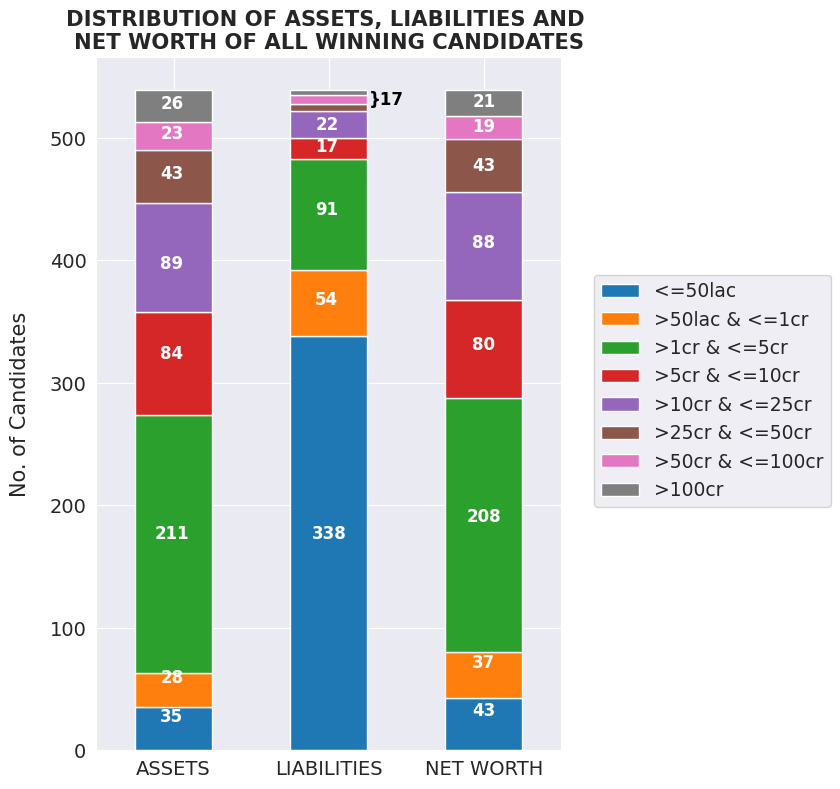

In [58]:
sns.set_palette("tab10")
# set color sequence
worth_df.plot(x = "index", kind = 'bar', stacked = True, figsize = (6,9))
# plot a Stacked Bar chart

plt.xticks(rotation = 0)
plt.tick_params(labelsize = 14)
plt.xlabel(None)
plt.ylabel("No. of Candidates", fontsize = 15, labelpad = 14)
# plot detailing

plt.title("DISTRIBUTION OF ASSETS, LIABILITIES AND \nNET WORTH OF ALL WINNING CANDIDATES", fontsize = 15.25,
           weight = 'bold')
plt.legend(fontsize = 13.5, bbox_to_anchor = [1.05,0.7]);
# title and legend placed at appropriate positions

# for the following process of writing data on the graph, I'm sure there must be some simpler annotation method,
# but for now, I'm using the direct printing approach

# ASSETS
plt.figtext(0.232, 0.142, worth_df.loc[0]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.185, worth_df.loc[0][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.223, 0.345, worth_df.loc[0][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.545, worth_df.loc[0][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.645, worth_df.loc[0][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.745, worth_df.loc[0][">25cr & <=50cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.790, worth_df.loc[0][">50cr & <=100cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.823, worth_df.loc[0][">100cr"], color = 'white', fontsize = 12, weight = "bold");

# LIABILITIES
plt.figtext(0.485, 0.345, worth_df.loc[1]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.605, worth_df.loc[1][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.705, worth_df.loc[1][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.775, worth_df.loc[1][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.800, worth_df.loc[1][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.58, 0.827, "}" + str(worth_df.loc[1][">25cr & <=50cr"]+worth_df.loc[1][">50cr & <=100cr"]+worth_df.loc[1][">100cr"]),
            color = 'black', fontsize = 12, weight = "bold");

# NET WORTH
plt.figtext(0.752, 0.148, worth_df.loc[2]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.202, worth_df.loc[2][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.743, 0.364, worth_df.loc[2][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.555, worth_df.loc[2][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.668, worth_df.loc[2][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.754, worth_df.loc[2][">25cr & <=50cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.797, worth_df.loc[2][">50cr & <=100cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.825, worth_df.loc[2][">100cr"], color = 'white', fontsize = 12, weight = "bold");

In [59]:
print("Percentage of MPs with Assets >1cr = ",
      round((542-(worth_df.at[0, "<=50lac"] + worth_df.at[0, ">50lac & <=1cr"]))/542*100, 2), "%", sep = "")
print("Percentage of MPs with Net Worth >1cr = ",
      round((542-(worth_df.at[2, "<=50lac"] + worth_df.at[2, ">50lac & <=1cr"]))/542*100, 2), "%", sep = "")

Percentage of MPs with Assets >1cr = 88.38%
Percentage of MPs with Net Worth >1cr = 85.24%


We infer, as per the popular opinion, an outrageous **88.19%** of the elected MPs have Assets more than 1 crore, with *26* MPs being in the Super Rich category with more than 100 crores worth of Assets. An **84.87%** of the elected MPs have a Net Worth of more than 1 crore, with *21* of them belonging to the Super Rich category with a Net Worth of more than 100 crores.

<div style="background-color:lightblue; padding:8px; border-radius:5px;">
    <h2 style="color:black; font-weight:bold; text-align:center;">Q4: Which 10 constituencies saw the Most One-sided and the Closest victories respectively?</h2>
</div>

In [60]:
# get all the candidates

candidates = candidate_df[["STATE", "CONSTITUENCY", "NAME", "WINNER", "PARTY", "TOTAL VOTES"]]
candidates = candidates[candidates.NAME != "NOTA"]

We extract only the winners and runners-up from each constituency and store the margin of victory.

In [61]:
# winners and runners_up -> temporary DataFrames

# winners and runner ups in all seats
winners = candidates[candidates.WINNER == 1]
runners_up = candidates.loc[winners.index + 1]

# reset index for better access
winners.reset_index(drop = True, inplace = True)
runners_up.reset_index(drop = True, inplace = True)

# drop the win indicator, we know who is who
winners.drop(["WINNER"], axis = 1, inplace = True)
runners_up.drop(["WINNER"], axis = 1, inplace = True)

In [62]:
# margin -> temporary DataFrame
margin = pd.DataFrame(winners["TOTAL VOTES"].to_numpy() - runners_up["TOTAL VOTES"].to_numpy(), columns = ["MARGIN OF VICTORY"])


In [63]:
# Some more processing done on the temporary DataFrames

# Candidate name and Party in one column, drop the previous Name and Party columns and rename votes with winner votes

winners.insert(3, "WINNER", winners["NAME"] + " (" + winners["PARTY"] + ")")
winners.drop(["NAME", "PARTY"], axis = 1, inplace = True)
winners.rename(columns = {'TOTAL VOTES' : "WINNER VOTES"}, inplace = True)

# Candidate name and Party in one column, drop the previous Name and Party columns and rename votes with runner-up votes
# STATE and CONSTITUENCY are dropped because they will be inherited from the 'winners' DataFrame
runners_up.insert(3, "RUNNER UP", runners_up["NAME"] + " (" + runners_up["PARTY"] + ")")
runners_up.drop(["NAME", "PARTY", "STATE", "CONSTITUENCY"], axis = 1, inplace = True)
runners_up.rename(columns = {'TOTAL VOTES' : "RUNNER-UP VOTES"}, inplace = True)

In [64]:
# the winners DataFrame and runners_up DataFrame are joined by the columns

candidates = pd.concat([winners, runners_up, margin], axis = 1)

In [65]:
lowest_margin = candidates.sort_values(by = "MARGIN OF VICTORY").head(10)
highest_margin = candidates.sort_values(by = "MARGIN OF VICTORY", ascending = False).head(10)
# get the 2 lists

In [66]:
# purely for aesthetics

lowest_margin.insert(2, "PLACE", lowest_margin.CONSTITUENCY + " (" + lowest_margin.STATE + ")")
lowest_margin.drop(["STATE", "CONSTITUENCY"], inplace = True, axis = 1)
lowest_margin.rename(columns = {"PLACE" : "CONSTITUENCY"}, inplace = True)
lowest_margin.index = np.arange(1,11)

# do some styling on both DataFrames for visual purposes

highest_margin.insert(2, "PLACE", highest_margin.CONSTITUENCY + " (" + highest_margin.STATE + ")")
highest_margin.drop(["STATE", "CONSTITUENCY"], inplace = True, axis = 1)
highest_margin.rename(columns = {"PLACE" : "CONSTITUENCY"}, inplace = True)
highest_margin.index = np.arange(1,11)

In [67]:
lowest_margin

,CONSTITUENCY,WINNER,WINNER VOTES,RUNNER UP,RUNNER-UP VOTES,MARGIN OF VICTORY
1,AURANGABAD (Bihar),NARESH YADAV (BSP),33772,UPENDRA PRASAD (HAMS),357169,-323397
2,MACHHLISHAHR (Uttar Pradesh),Bholanath (B.P. Saroj) (BJP),488397,Tribhuvan Ram (T.Ram) (BSP),488216,181
3,LAKSHADWEEP (Lakshadweep),MOHAMMED FAIZAL PP (NCP),22851,HAMDULLAH SAYEED (INC),22028,823
4,ARAMBAGH (West Bengal),APARUPA PODDAR (AFRIN ALI) (AITC),649929,TAPAN KUMAR RAY (BJP),648787,1142
5,ANDAMAN & NICOBAR ISLANDS (Andaman & Nicobar I...,KULDEEP RAI SHARMA (INC),95308,VISHAL JOLLY (BJP),93901,1407
6,KHUNTI (Jharkhand),ARJUN MUNDA (BJP),382638,KALI CHARAN MUNDA (INC),381193,1445
7,JAHANABAD (Bihar),CHANDESHWAR PRASAD (JD(U)),335584,SURENDRA PRASAD YADAV (RJD),333833,1751
8,CHAMARAJANAGAR (Karnataka),V. SRINIVAS PRASAD (BJP),568537,R. DHRUVANARAYANA (INC),566720,1817
9,BARDHAMAN DURGAPUR (West Bengal),S.S AHLUWALIA (BJP),598376,DR. MAMTAZ SANGHAMITA (AITC),595937,2439
10,CHIDAMBARAM (Tamil Nadu),THIRUMAAVALAVAN THOL (VCK),500229,CHANDRASEKAR P (AIADMK),497010,3219


Compared to the table of the most One-Sided victories, the table of Closest victories consists of many different contests and in different regions of the country.
<br></br>Island seats of Lakshadweep and Andaman & Nicobar Islands saw the 2nd and 4th most competitive contests with a margin of victory of *823* votes and *1407* votes respectively.
<br>**B.P. Saroj** of **BJP** won the closest victory over **Tribhuvan Ram** of **BSP** with *181* votes in Machhlishahr, Uttar Pradesh.

In [68]:
highest_margin

,CONSTITUENCY,WINNER,WINNER VOTES,RUNNER UP,RUNNER-UP VOTES,MARGIN OF VICTORY
1,NAVSARI (Gujarat),C. R. Patil (BJP),972739,PATEL DHARMESHBHAI BHIMBHAI (INC),283071,689668
2,KARNAL (Haryana),Sanjay Bhatia (BJP),911594,Kuldip Sharma (INC),255452,656142
3,FARIDABAD (Haryana),KRISHAN PAL (BJP),913222,AVTAR SINGH BHADANA (INC),274983,638239
4,BHILWARA (Rajasthan),SUBHASH CHANDRA BAHERIA (BJP),938160,RAM PAL SHARMA (INC),326160,612000
5,VADODARA (Gujarat),RANJANBEN BHATT (BJP),883719,PRASHANT PATEL (TIKO) (INC),294542,589177
6,WEST DELHI (NCT OF Delhi),PARVESH SAHIB SINGH VERMA (BJP),865648,MAHABAL MISHRA (INC),287162,578486
7,CHITTORGARH (Rajasthan),Chandra Prakash Joshi (BJP),982942,Gopal Singh Shekhawat (INC),406695,576247
8,GANDHINAGAR (Gujarat),AMIT SHAH (BJP),894624,Dr. C. J. CHAVDA (INC),337610,557014
9,NORTH WEST DELHI (NCT OF Delhi),HANS RAJ HANS (BJP),848663,GUGAN SINGH (AAP),294766,553897
10,HOSHANGABAD (Madhya Pradesh),UDAY PRATAP SINGH (BJP),877927,SHAILENDRA DIWAN CHANDARBHAN SINGH (INC),324245,553682


We see from the table, as has been the case for most of the election, all 10 winners on the list are from **BJP**, while 9 of the 10 runners-up are from **INC**.
<br>As we can infer from the table, *Gujarat*, *Haryana*, *Rajasthan* and *NCT of Delhi* saw the most one-sided contests.</br>
<br>**C.R. Patil** won by a record margin of more than *6.89 lakh* votes from Navsari, Gujarat. BJP National President and future Home Minister **Amit Shah** won by more than *5.5 lakh* votes from Gandhinagar, Gujarat.

<div style="background-color:lightblue; padding:8px; border-radius:5px;">
    <h2 style="color:black; font-weight:bold; text-align:center;">Q5: What is the region-wise distribution of seats across the country?
</h2>
</div>

In [74]:
# get the names of the States

winner_df.STATE.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'NCT OF Delhi', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [75]:
# group the states into 6 regions

India = {'NORTH INDIA': ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana', 'Uttarakhand', 'NCT OF Delhi', 'Chandigarh'],
         'CENTRAL INDIA': ['Uttar Pradesh', 'Madhya Pradesh', 'Chhattisgarh'],
         'WEST INDIA': ["Gujarat", "Rajasthan", "Maharashtra", "Goa", "Dadra & Nagar Haveli", "Daman & Diu"],
         'SOUTH INDIA': ['Karnataka', 'Andhra Pradesh', 'Telangana', 'Kerala', 'Tamil Nadu', 'Puducherry', 'Lakshadweep'],
         'EAST INDIA': ["Bihar", "Jharkhand", "West Bengal", "Odisha", "Andaman & Nicobar Islands"],
         'NORTH-EAST INDIA': ['Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura']}

In [79]:
dist = {}

for region in India.keys():
    for state in India[region]:
        temp = extracted[extracted.STATE == state]
        if region not in dist:
            dist[region] = temp
        else:
            dist[region] = pd.concat([dist[region], temp], ignore_index=True)


In [80]:
dist.keys()

dict_keys(['NORTH INDIA', 'CENTRAL INDIA', 'WEST INDIA', 'SOUTH INDIA', 'EAST INDIA', 'NORTH-EAST INDIA'])

Now we need to maintain 2 dictionaries - `plot_seats_data` and `plot_percent_data`.
>`plot_seats_data` contains the region-wise distribution of seats in a State vs Party format.
> <br>`plot_percent_data` contains the region-wise distribution of seat percentages in a State vs Party format.
> </br>
> <br>`plot_seats_data` will be used for printing the data on the graphs.
> <br>`plot_percent_data` will be used for plotting the data as a stacked graph.

In [81]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690


In [82]:
plot_seats_data = {}
plot_percent_data = {}

# The 2 dictionaries are filled simultaneously
for region in dist.keys():
    # Getting the number of seats
    seats = pd.DataFrame(dist[region].groupby(["STATE", "PARTY"]).size()).unstack(fill_value=0)
    seats.columns = seats.columns.droplevel()

    # Getting the seat percentages
    values = dist[region].groupby(["STATE", "PARTY"]).size() / len(dist[region]) * 100
    values = values.unstack(fill_value=0)

    # Rearranging columns to place "BJP" and "INC" at the beginning
    seats = seats[["BJP", "INC"] + [col for col in seats.columns if col not in ["BJP", "INC"]]]
    values = values[["BJP", "INC"] + [col for col in values.columns if col not in ["BJP", "INC"]]]

    # Calculating total seats and appending to the DataFrame
    seats.loc["Total"] = seats.sum()
    values.loc["Total"] = values.sum()

    # Storing the DataFrames in dictionaries
    plot_seats_data[region] = seats
    plot_percent_data[region] = values


In [83]:
# Let's see how each DataFrame looks by taking an example in the `plot_seats_data` dictionary, with the key `"CENTRAL INDIA"`.

plot_seats_data["CENTRAL INDIA"]

PARTY,BJP,INC,ADAL,BSP,SP
STATE,,,,,
Chhattisgarh,9,2,0,0,0
Madhya Pradesh,28,1,0,0,0
Uttar Pradesh,60,1,2,10,5
Total,97,4,2,10,5


As mentioned before, we have the number of Seats arranged in a State vs Party format.<br>
Similarly `plot_percent_data` has the Seat Percentages arranged in a State vs Party format.

As each party as a characteristic color code, it would be better to have color coding for each Party in the Visualization process for easier interpretation.

In [84]:
# dictionary containing color codes for each National and Regional Party which won at least 1 seat

party_colors = {'BJP': "#f97d09", 'INC': "#00bdfe", 'AITC': "#32cd32", 'BSP': "#22409a", 'SP': "#fe0000", 'DMK': "#000000",
                'YSRCP': "#0266b4", 'SHS': "#ff6634", 'AAP': "#2e5984", 'JKN': "#ff0000", 'SAD': "#000080", 'RLTP': "#e0dd14",
                'AIMIM': "#20783b", 'NCP': "#20b2aa", 'IND': "#a9a9a9", 'ADAL': "#8f00ff", 'JD(U)': "#00264d", 'LJP' : "#2595d4",
                'AJSUP': "#a32a70", 'JMM': "#004b1f", 'BJD': "#008717", 'AIUDF': "#00ff00", 'NPF': "#28166f", 'NPEP': "#db4874",
                'MNF': "#1e3f66", 'NDPP': "#ed2939", 'SKM': "#b6850d", 'JD(S)': "#00923f", 'TDP': "#ffff00", 'TRS': "#fe0175",
                'CPI(M)': "#de0000", 'RSP': "#65350f", 'KEC(M)': "#e8cb0e", 'IUML': "#006600", 'VCK': "#6332cd", 'AIADMK': "#32cd32"
               }

In [85]:

def colors(parties):
    '''
    Function to return the color scheme according to the parties in the region

    parties - list of party names
    '''
    col = []
    for party in parties:
        col.append(party_colors[party])
#         for each party, return its corresponding color code from the dictionary
    return col

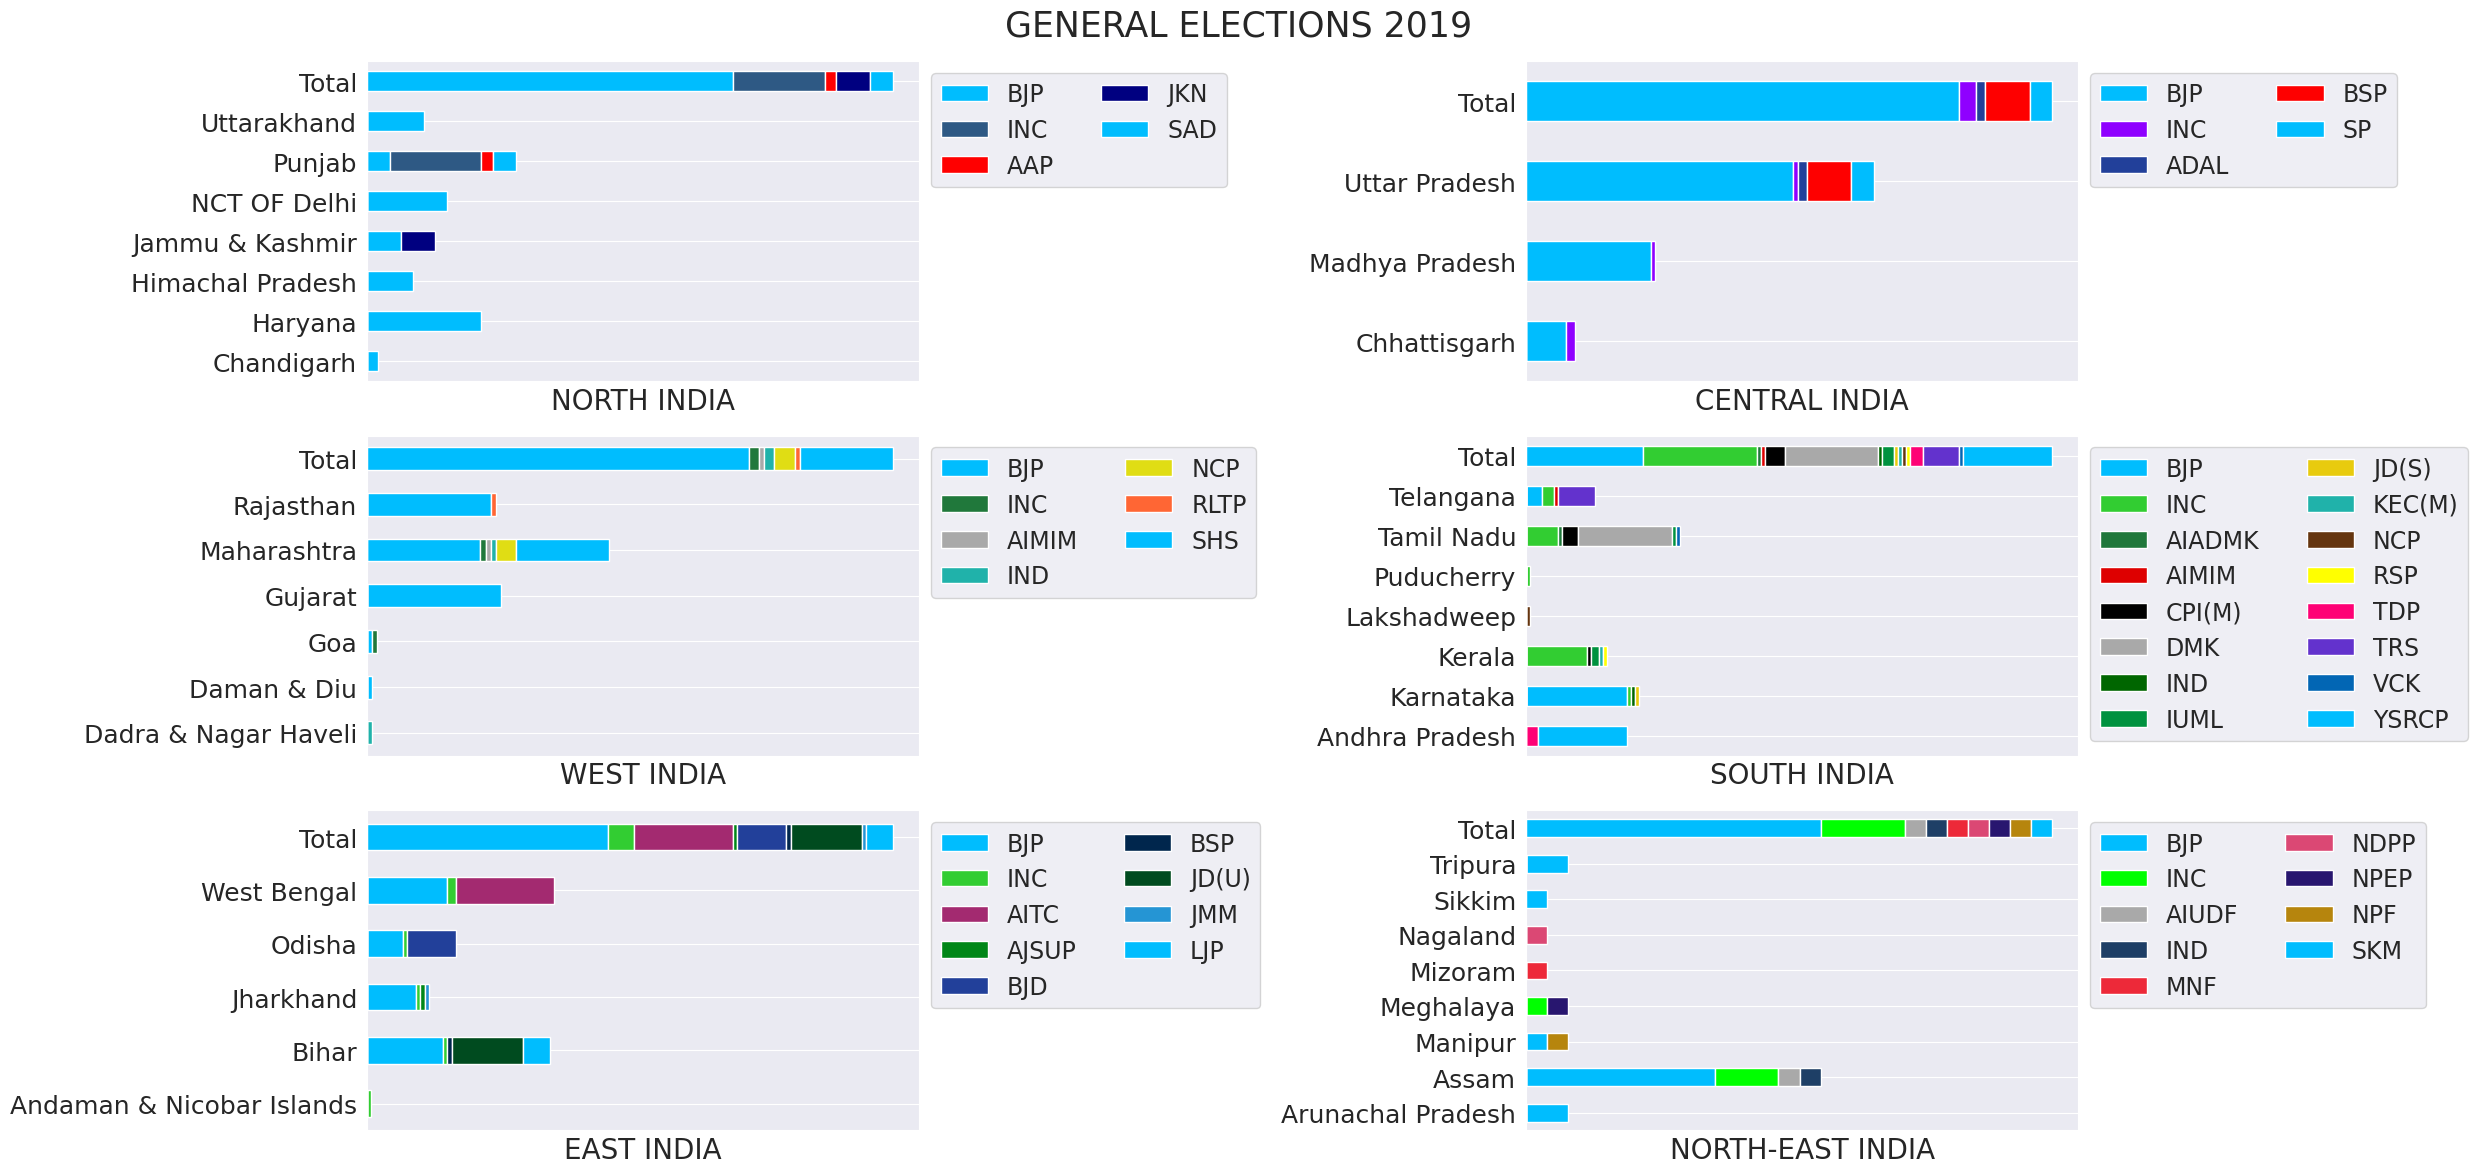

In [86]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(25, 12))
# plot will be a subplot of 6 plots

i = 0  # row index
j = 0  # column index

fig.suptitle("GENERAL ELECTIONS 2019", fontsize=25)
# title for the entire Multiplot

for region in plot_percent_data.keys():
    # for each region
    data = plot_percent_data[region]
    # take the corresponding seat percent DataFrame

    data.plot(ax=axes[i, j], kind="barh", stacked=True, color=colors(data.columns[1:]))
    # plot the stacked distribution

    axes[i, j].legend(bbox_to_anchor=[1, 1], fontsize=17, ncol=2)
    axes[i, j].xaxis.set_ticks([])
    axes[i, j].set_xlabel(region, fontsize=20)
    axes[i, j].tick_params(labelsize=18)
    axes[i, j].set_ylabel("")
    # style the subplots

    # subplot choosing condition
    j += 1
    if j == 2:
        j = 0
        i += 1

fig.tight_layout()
# to prevent overlapping of plots
plt.show()


In [87]:
for region in plot_percent_data.keys():
    print(f"Region: {region}")
    print("Columns:", plot_percent_data[region].columns)
    print("First few rows of data:")
    print(plot_percent_data[region].head())
    print()


Region: NORTH INDIA
Columns: Index(['BJP', 'INC', 'AAP', 'JKN', 'SAD'], dtype='object', name='PARTY')
First few rows of data:
PARTY                   BJP  INC  AAP       JKN  SAD
STATE                                               
Chandigarh         2.173913  0.0  0.0  0.000000  0.0
Haryana           21.739130  0.0  0.0  0.000000  0.0
Himachal Pradesh   8.695652  0.0  0.0  0.000000  0.0
Jammu & Kashmir    6.521739  0.0  0.0  6.521739  0.0
NCT OF Delhi      15.217391  0.0  0.0  0.000000  0.0

Region: CENTRAL INDIA
Columns: Index(['BJP', 'INC', 'ADAL', 'BSP', 'SP'], dtype='object', name='PARTY')
First few rows of data:
PARTY                 BJP       INC      ADAL       BSP        SP
STATE                                                            
Chhattisgarh     7.627119  1.694915  0.000000  0.000000  0.000000
Madhya Pradesh  23.728814  0.847458  0.000000  0.000000  0.000000
Uttar Pradesh   50.847458  0.847458  1.694915  8.474576  4.237288
Total           82.203390  3.389831  1.69491

We can infer from the plots that **Central India** and **West India** were the strongholds of *BJP* whereas **South India** and **East India** were the regions where *BJP* struggled against regional parties like *DMK*, *YSRCP*, *AITC* and *BJD*. In **North India** and **North-East India**, *BJP* was the largest party, but it faced some opposition from regional parties and *INC*.
<br></br>*INC* saved some face in some **South Indian** states like Kerala and Tamil Nadu, and in Punjab in **North India**, but had a dismal performance in rest of the country.

Winning **32/46 seats** in *North India*, **99/120 seats** in *Central India*, **75/103 seats** in *West India*, and **14/25 seats** in *North-East India*, the **BJP** emerged as the Single Largest Party across the country.
<br>Even in **East India**, where it had a pre-poll alliance with **JD(U)** and **LJP** in Bihar, the **BJP-led NDA** won **76/118 seats** making inroads in traditionally non-BJP states such as Odisha and West Bengal.
<br>Despite winning seats in only 2 **South Indian** states, the **BJP** emerged as the largest party in the region with **29/130 seats** beating the **INC** by 1 seat.
<br>Despite having Opposition State Governments, the **BJP** made heavy gains in *NCT of Delhi* (AAP), *Rajasthan* (INC), *Chhattisgarh* (INC), *Madhya Pradesh* (then-INC), *Jharkhand* (JMM-UPA), *Odisha* (BJD) and *West Bengal* (AITC).

<br></br>***The region-wise Analysis only solidifies the claim that the BJP has become a pan-India party, winning seats all across the country.***

<div style="background-color:red; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;"> Inferences and Conclusion</h2>
</div>

---
To sum up the entire analysis in 1 statement:
<br></br>**The incumbent BJP Government led by Prime Minister Narendra Modi secured an overwhelming victory over its opponents and secured a second term in the office, winning 303 seats out of 542.**
<br></br>
---

* The average age of the House is *54 years* with maximum MPs between the ages 45-70.
* Nearly *26%* of the seats in the House are reserved for SC/ST candidates.
* More than *14%* of the House consists of Women MPs.
* Female candidates had a much higher winning percentage *(30.23%)* as compared to Male candidates *(26.36%)*.
* Less than *150 MPs* are 12th Pass or below.
* The National average Voter Turnout was *65.26%*.
* Many North Eastern states registered some of the highest voter turnouts in the country.
* Important states like Bihar, Uttar Pradesh, and Maharashtra had the lowest voter turnouts in the country.
* Lakshadweep had the best voter turnout of nearly *84%*.
* Jammu and Kashmir had the worst voter turnout of about *42.6%*.
* More than *43%* of the elected MPs have a self-declared criminal record, with the *BJP* and the *INC* combined having more than *62%* of those.
* An astonishing *88%* of the elected MPs have Assets worth more than 1 crore while nearly *85%* of the MPs have a Net Worth higher than 1 crore.
* **One of the key takeaways from the EDA is that wherever it was a direct contest between *BJP* and *INC*, people favored the  *BJP* candidate more.**
* **C.R. Patil** registered a record margin of victory with over *6.89 lakhs votes* in Navsari, Gujarat.
* B.P. Saroj of BJP won the closest victory over Tribhuvan Ram of BSP with just *181 votes* in Machhlishahr, Uttar Pradesh.
* The **BJP** dominated the Opposition in all parts of the country, sweeping **North India**, **Central India**, **West India** and **North-East India** while making substantial gains in **East India** and emerging as the largest party in **South India**.
* **INC**, the principal opposition party, on the other hand, had a very sorrowful outing in the Polls. It failed to have any significant impact anywhere in the country, except in the **South Indian** states of Kerala and Tamil Nadu, and some seats in *Punjab* and *Assam*.
<br></br>
---

To conclude, the newly elected 17th Lok Sabha will be led by Prime Minister Narendra Modi and his party the Bharatiya Janata Party (BJP), with Indian National Congress (INC) being the second largest party in the House.